# Curso de introducción a la programación con Python

**Autor: Luis Fernando Apáez Álvarez**

## Clase 9: Herencia múltiple (Parte I)

* [Primeros ejemplos](#parte1)    

## Primeros ejemplos <a id="parte1"></a>

Comencemos esta sesión creando una clase para poder graficar puntos en un espacio de tres dimensiones, lo cual conseguimos escribiendo

In [1]:
#--------------------------------------------------------------------------------------
# Realizamos las importaciones necesarias para trabajar en esta sesión:

from mpl_toolkits import mplot3d  # Módulo para trabajar con gráficas en 3 dimensiones
import matplotlib.pyplot as plt
import numpy as np

#--------------------------------------------------------------------------------------

# Creamos la clase Graficador3

class Graficador3():
    
    # Constructor
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    # Creamos el método para graficar el punto
    def graficar(self):
        
        # Configuración de los ejes
        axes = plt.axes(projection="3d")
        axes.set_title("Punto en 3 dimensiones",fontsize=14,fontweight="bold")
        axes.set_xlabel("X")
        axes.set_ylabel("Y")
        axes.set_zlabel("Z")
        
        # Creamos la gráfica del punto 
        axes.scatter(self.x , self.y , self.z,  color='blue')
        
        # Mostramos la gráfica
        plt.show()

posteriormente

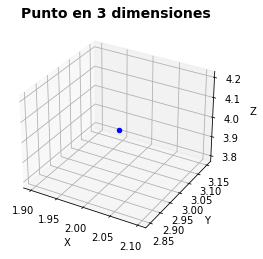

In [2]:
# Creamos un objeto de la clase Graficador3
q1 = Graficador3(2, 3, 4)

# Invocamos el método Graficar()
q1.graficar()

Ahora bien, nos gustaría que a los puntos graficados en 3 dimensiones se les pueda calcular también la **norma**, entonces podemos pensar a la clase _Punto3_ (vista en la sesión anterior) como una subclase de _Graficador3_ consiguiendo así que el método ``graficar()`` sea heredado a la subclase _Punto3_. No obstante, recordemos que la clase _Punto3_ es una subclase de _Punto2_, de modo que, al buscar que dicha clase sea también subclase de _Graficador3_, estamos pensando entonces en el concepto de **herencia múltiple**.

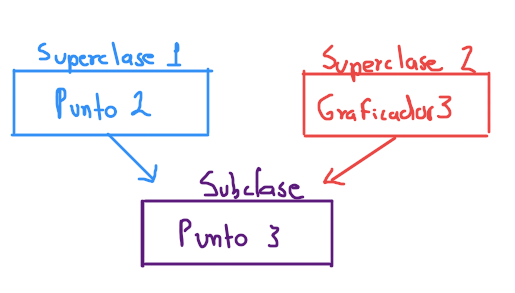

Hasta ahora, cuando trabajabamos con una superclase y subclase abordabamos el concepto de **herencia simple**, la cual consiste básicamente en que las subclases sólo tendrán una única superclase. Ahora bien, para trabajar con subclases que poseen más de una superclase estaremos utilizando **herencia múltiple** (así como indica la imagen anterior).

Para continuar recordemos el código de la superclase _Punto2_

In [13]:
# Superclase Punto2
class Punto2():
    
    # Constructor
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # __str__
    def __str__(self):
        return f'{self.x, self.y}'
    
    # Método norma:
    def auxiliar(self):
        return self.x ** 2 + self.y ** 2
    
    def norma2(self):
        return np.sqrt(self.auxiliar())

y pasemos a modificar el código de la subclase _Punto3_ de modo que las clases _Punto2_ y _Graficador3_ sean sus respectivas superclases. Para ello

1. Al momento de definir la subclase _Punto3_ pondremos como parámetros los nombres de las superclases. Es decir, en vez de escribir ``class Punto3(Punto2)`` como lo habíamos escrito en sesiones anteriores pondremos ``class Punto3(Punto2, Graficador3)``

2. En herencia múltiple no utilizaremos el ``super().`` para referenciar métodos de las superclases, pues en estos casos tendremos más de una superclase en cuestión. En su lugar usaremos ``nombre_de_la_superclase().``

veamos pues la modificación pertinente del código

In [18]:
# Subclase Punto3 de las superclase Punto2 y Graficador3

class Punto3(Punto2, Graficador3):
    
    # Constructor
    def __init__(self, x, y, z):
        
        # Hacemos referencia de los parámetros del método __init__ de la superclase
        # Punto2:
        
        Punto2.__init__(self, x, y)
        
        # Atributo propio de la subclase Punto3
        self.z = z
        
    # __str__
    def __str__(self):
        
        # Hacemos referencia de la salida del método __str__ de la superclase 
        # Punto2:
        
        return f'({Punto2.__str__(self)},{self.z})'
    
    # Método norma
    def auxiliar(self):
        return super().auxiliar() + self.z ** 2
    
    def norma3(self):
        return np.sqrt(self.auxiliar())

luego, creamos un objeto de la clase _Punto3_ y vemos las característica que ha heredado de las dos superclases

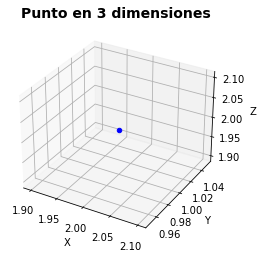

In [20]:
# Creamos un objeto de la clase Punto3
p1 = Punto3(2,1,2)

# Invocamos el método graficar() de la superclase Graficador3
p1.graficar()

In [21]:
# Invocamos el método __str__ 
print(p1)

# Invocamos el método norma3
print(p1.norma3())

((2, 1),2)
3.0


con lo cual hemos conseguido el resultado que buscabamos. Para continuar abordemos otro sencillo ejemplo, donde crearemos las siguientes clases

In [23]:
# Superclase 1

class Figura():
    
    # Constructor
    def __init__(self, ancho, altura):
        self.ancho = ancho
        self.altura = altura
# ---------------------------------------        
# Superclase 2 

class Color():
    
    # Constructor
    def __init__(self, color):
        self.color = color

las cuales abordan las dimensiones del ``ancho`` y ``altura`` de una figura geométrica (en la clase _Figura_) y el color (en la clase _Color_). Posteriormente crearemos la clase _Cuadrado_ como subclase de las clase _Figura_ y _Color_ como sigue 

In [24]:
# Subclase Cuadrado de las superclases Figura y Color

class Cuadrado(Figura, Color):
    
    # Constructor
    def __init__(self, lado, color):
        
        # Sobreescritura del método __init__ correspondiente a la clase Figura
        Figura.__init__(self, lado, lado)
        
        # Sobreescritura del método __init__ correspondiente a la clase Color
        Color.__init__(self, color)

donde el parámetro de ``lado`` del método ``__init__`` de la clase _Cuadrado_ jugará tanto en el papel del parámetro ``ancho`` como el papel del parámetro ``altura`` de la clase _Figura_. De tal manera

In [25]:
# Creamos un objeto de la clase Cuadrado
c1 = Cuadrado(2, 'Verde')

# Veamos algunas características heredadas de la clase Figura
print(f'Ancho: {c1.ancho}')
print(f'Altura: {c1.altura}')

print()

# Veamos algunas características heredadas de la clase Color
print(f'Color: {c1.color}')

Ancho: 2
Altura: 2

Color: Verde


Finalmente, podemos agregar un método en la clase _Cuadrado_ para calcular el área:

In [26]:
# Subclase Cuadrado de las superclases Figura y Color

class Cuadrado(Figura, Color):
    
    # Constructor
    def __init__(self, lado, color):
        
        # Sobreescritura del método __init__ correspondiente a la clase Figura
        Figura.__init__(self, lado, lado)
        
        # Sobreescritura del método __init__ correspondiente a la clase Color
        Color.__init__(self, color)
        
    # Método para calcular el área
    def area(self):
        return self.ancho * self.altura

donde podemos observar que escribimos ``self.ancho * self.altura`` en vez de intentar escribir ``self.lado * self.lado``. La razón radica en que tanto ``self.ancho`` como ``self.altura`` son atributos heredados de la clase _Figura_ y el nombre de ``lado`` sólo hace alusión al nombre del parámetro que pasamos en el constructor de la clase _Cuadrado_. Además, podemos ver fácilmente que dicho constructor no posee atributos propios, por lo que, en este caso, sería totalmente erróneo pensar en ``self.lado``. Luego

In [27]:
# Creamos un objeto de la clase Cuadrado
c2 = Cuadrado(4, 'Azul')

# Invocamos el método area()
c2.area()

16